# Mathematics for Machine Learning

## Session 20: Trigonometric and exponential functions; logarithms

### Gerhard Jäger


January 14, 2025

---
<br><br>

<small>Most material taken from Chapters 2 and 7 of Keisler, H. Jerome. *Elementary Calculus: An Infinitesimal Approach*. 2012.</small><br>
<small>Applets programmed with the help of ChatGPT</small>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


## Trigonometric function

Consider a unit circle, with a point $(x,y)$ on the circle.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib.patches import Arc

def unit_circle(theta_deg=0):
    theta = np.radians(theta_deg)
    x = np.cos(theta)
    y = np.sin(theta)

    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 10))  # Larger plot
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal', 'box')

    # Draw the unit circle
    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    ax.add_artist(circle)

    # Draw the angle theta
    ax.plot([0, x], [0, y], color='black')  # Hypotenuse
    ax.plot([0, x], [0, 0], color='blue', linestyle='--')  # Adjacent (cosine)
    ax.plot([x, x], [0, y], color='green', linestyle='--')  # Opposite (sine)

    # Draw colored arc on the circumference
    arc = Arc((0, 0), 2, 2, theta1=0, theta2=theta_deg, color='purple', linewidth=2)
    ax.add_artist(arc)

    # Calculate position for the theta label just outside the arc
    arc_x = 1.1 * np.cos(theta / 2)  # Slightly outside the unit circle
    arc_y = 1.1 * np.sin(theta / 2)
    ax.text(arc_x, arc_y, r'$\theta$', color='purple', fontsize=16, ha='center', va='center')

    # Add annotations for sine and cosine
    ax.text(x / 2, 0, r'$\cos(\theta)$', color='blue', fontsize=16, ha='center', va='center')
    ax.text(x + 0.05, y / 2, r'$\sin(\theta)$', color='green', fontsize=16, ha='left', va='center')

    # Add labels
    ax.text(1.1, 0, "1", fontsize=16, ha='left', va='center')
    ax.text(0, 0, "(0, 0)", fontsize=12, ha='center', va='center')

    # Axes
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

    plt.title("sine and cosine", fontsize=18)
    plt.grid(False)
    plt.show()

# Interactive slider
interact(unit_circle, theta_deg=(0, 360, 1))


interactive(children=(IntSlider(value=0, description='theta_deg', max=360), Output()), _dom_classes=('widget-i…

<function __main__.unit_circle(theta_deg=0)>

We measure the angle in *radians*, i.e., the length of the arc at the circumference of the unit circle inside the circle.


$$
\begin{align}
 \sin \theta &= \frac{\text{opposite}}{\text{hypotenuse}}\\[1em]
 \cos \theta &= \frac{\text{adjacent}}{\text{hypotenuse}}\\[1em]
 \tan \theta &= \frac{\text{opposite}}{\text{adjacent}}\\[1em]
 \cot \theta &= \frac{\text{adjacent}}{\text{opposite}}
\end{align}
$$

### The derivative of $\sin$

<img src="_img/Limit_circle_FbN.jpeg"  width="500" style="display: block; margin-left: auto; margin-right: auto;">


(source: Wikipedia)

<div style="float: right; width: 500px; margin-left: 20px;">
    <img src="_img/Limit_circle_FbN.jpeg" alt="Unit Circle Graphic" style="width: 100%;">
</div>
<div>
    
Let $\theta$ be the angle between $OA$ and $OB$, and let the radius of the circle be 1.

Then the height of the triangle $OAB$ is $\sin\theta$, and its area is $\frac{\sin \theta}{2}$.

The sector of the circle between $OA$ and $OB$ has the area $\frac{\theta}{2}$.

The length $|AC|$ is $\tan \theta$, so its area is $\frac{\tan\theta}{2}$.

It is obvious from the sketch that
    $$
    \frac{\sin\theta}{2} < \frac{\theta}{2} < \frac{\tan \theta}{2},
    $$

and therefore 
    $$
    \sin\theta < \theta < \tan\theta = \frac{\sin\theta}{\cos\theta}.
    $$

Dividing everything by $\sin\theta$ (assuming $\sin\theta\neq 0$ gives us

$$
1 < \frac{\theta}{\sin\theta} < \frac{1}{\cos\theta}
$$
</div>


<div style="float: right; width: 500px; margin-left: 20px;">
    <img src="_img/Limit_circle_FbN.jpeg" alt="Unit Circle Graphic" style="width: 100%;">
</div>
<div>
    
Inverting everything swaps the inequality:

$$
\cos\theta < \frac{\sin\theta}{\theta} < 1
$$

It follows from Pythagoras' Theorem that $\cos \theta = \sqrt{1-\sin^2\theta}$:

$$
\sqrt{1-\sin^2\theta} < \frac{\sin\theta}{\theta} < 1
$$

Now suppose $\sin\theta$ is infinitesimal. Then
$$
\begin{align}
st(\sqrt{1-\sin^2\theta}) &= 1
\end{align}
$$

Since $\frac{\sin\theta}{\theta}$ is between two numbers with standard part $=1$, it follows that
$$
\frac{\sin\theta}{\theta} \approx 1
$$

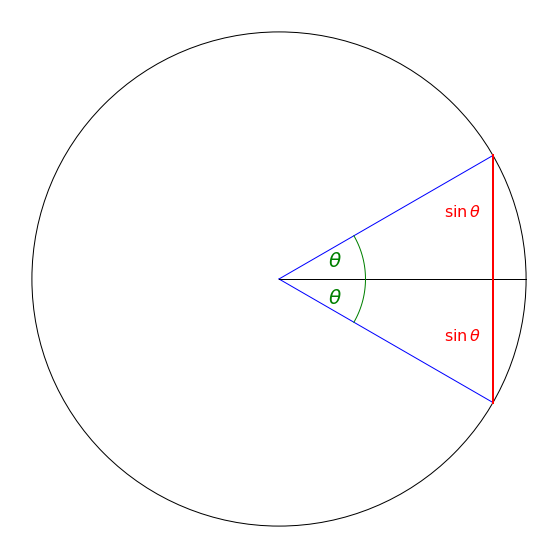

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Redraw with a larger plot size and increased font size for the labels
fig, ax = plt.subplots(figsize=(10, 10))  # Increased figure size
ax.set_aspect('equal')
ax.axis('off')

# Draw the main circle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Define the angle θ (in radians) - make it smaller
theta = np.pi / 6  # 30 degrees

# Plot the radius lines
# Upper triangle
ax.plot([0, np.cos(theta)], [0, np.sin(theta)], color='blue', linestyle='-', linewidth=1)  # First radius
ax.plot([0, 1], [0, 0], color='black', linestyle='-', linewidth=1)  # Second radius
# Lower triangle (mirrored)
ax.plot([0, np.cos(theta)], [0, -np.sin(theta)], color='blue', linestyle='-', linewidth=1)  # First radius
ax.plot([0, 1], [0, 0], color='black', linestyle='-', linewidth=1)  # Second radius

# Highlight the sine components
ax.plot([np.cos(theta), np.cos(theta)], [0, np.sin(theta)], color='red', linestyle='-', linewidth=2)  # Upper sine
ax.plot([np.cos(theta), np.cos(theta)], [0, -np.sin(theta)], color='red', linestyle='-', linewidth=2)  # Lower sine

# Draw arcs for θ
arc_radius = 0.35
arc = np.linspace(0, theta, 100)
# Upper arc
ax.plot(arc_radius * np.cos(arc), arc_radius * np.sin(arc), color='green', linewidth=1)
# Lower arc (mirrored)
ax.plot(arc_radius * np.cos(arc), -arc_radius * np.sin(arc), color='green', linewidth=1)

# Label θ near the arcs
ax.text(0.2, 0.05, r'$\theta$', color='green', fontsize=20)  # Upper label
ax.text(0.2, -0.1, r'$\theta$', color='green', fontsize=20)  # Lower label

# Label sin θ (moved to the left of the red line)
ax.text(np.cos(theta) - 0.2, np.sin(theta) / 2, r'$\sin \theta$', color='red', fontsize=16)  # Upper sine label
ax.text(np.cos(theta) - 0.2, -np.sin(theta) / 2, r'$\sin \theta$', color='red', fontsize=16)  # Lower sine label

# Set the limits of the plot
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# Show the plot
plt.show()


In the plot, the angle between the two blue lines is $2\theta$, and the length of the red line is $2\sin\theta$. If $\sin\theta$ is infinitesimal:

$$
\begin{align}
\frac{2\sin\theta}{2\theta} &= \frac{\sin\theta}{\theta}\\
&\approx 1
\end{align}
$$

In other words, the proportion of the secant of an angle to the length of the arc is infinitely close to $1$ if the secant is infinitesimal.


<div style="float: right; width: 1000px; margin-left: 20px;">

<img src="_img/delta_sin.svg"  style="width: 100%">
</div>

$$
\begin{align}
x^* &= x + \frac{\Delta x}{2}\\
\sin(x+\Delta x) - \sin(x) &= h\cos x^*\\
\frac{\sin(x+\Delta x)-\sin (x)}{\Delta x} &=\frac{h}{\Delta x}\cos x^*\\
\frac{d\sin x}{dx} &= st(\frac{h}{\Delta x}\cos x^*)\\
&=\cos x
\end{align}
$$

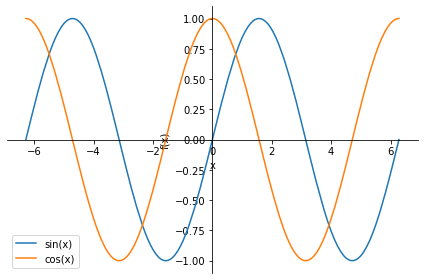

In [4]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define sine and cosine functions
sin_func = sp.sin(x)
cos_func = sp.cos(x)

# Plot using SymPy's plot function
p = sp.plot(
    sin_func, cos_func,
    (x, -2 * sp.pi, 2 * sp.pi),
    legend=True,
    show=False,  # To customize further
)
p[0].label = "sin(x)"
p[1].label = "cos(x)"
p.show()


## Derivatives of other trigonometric functions

From $\frac{d\sin x}{dx} = \cos x$, we can derive the derivatives of the other trigonometric functions.

### Cosine

$$
\begin{align}
\cos x &= \sin (\frac{\pi}{2}-x)\\
\frac{\cos x}{dx} &= -\cos(\frac{\pi}{2}-x)\\
&=-\sin(x)
\end{align}
$$

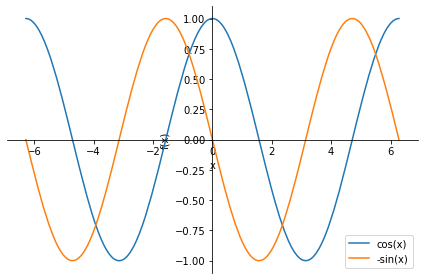

In [5]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define sine and cosine functions
f = sp.cos(x)
df = -sp.sin(x)

# Plot using SymPy's plot function
p = sp.plot(
    f, df,
    (x, -2 * sp.pi, 2 * sp.pi),
    legend=True,
    show=False,  # To customize further
)
p[0].label = "cos(x)"
p[1].label = "-sin(x)"
p.show()


### Tangent


$$
\begin{align}
\tan x &= \frac{\sin x}{\cos x} \\
\frac{d\tan x}{dx} &= \frac{\cos^2x+\sin^2 x}{\cos^2 x}\\
&=\frac{1}{\cos^2 x}
\end{align}
$$

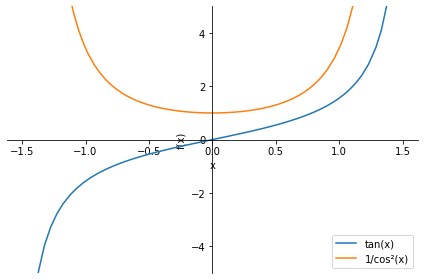

In [6]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define sine and cosine functions
f = sp.tan(x)
df = 1/sp.cos(x)**2

# Plot using SymPy's plot function
p = sp.plot(
    f, df,
    (x, -sp.pi/2+0.1, sp.pi/2-0.1),
    ylim = (-5,5),
    legend=True,
    show=False,  # To customize further
)
p[0].label = "tan(x)"
p[1].label = "1/cos²(x)"
p.show()


### Cotangent

$$
\begin{align}
\cot x &= \frac{\cos x}{\sin x}\\
\frac{d\cot x}{dx} &= \frac{-\sin^2x - \cos^2 x}{\sin^2x}\\
&= -\frac{1}{\sin^2 x}
\end{align}
$$

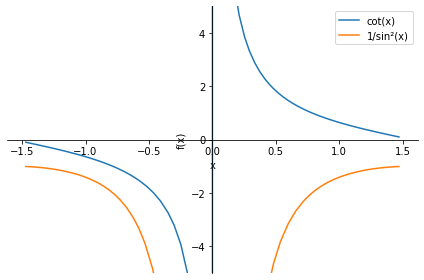

In [7]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define sine and cosine functions
f = sp.cot(x)
df = -1/sp.sin(x)**2

# Plot using SymPy's plot function
p = sp.plot(
    f, df,
    (x, -sp.pi/2+0.1, sp.pi/2-0.1),
    legend=True,
    ylim=(-5, 5),
    show=False,  # To customize further
)
p[0].label = "cot(x)"
p[1].label = "1/sin²(x)"
p.show()


## Inverse trigonometric functions

### arcsine

The *arcsine* ($\sin^{-1}$ or $\arcsin$) is the inverse of the *sine* function in the interval $(-\frac{\pi}{2}, \frac{\pi}{2})$. It has $(-1,1)$ as its domain and $(-\frac{\pi}{2}, \frac{\pi}{2})$ as range.

$$
\arcsin x = y \text{ if and only if } -\frac{\pi}{2} < y < \frac{\pi}{2}\text{ and } \sin y = x
$$

Note that in the interval $(-\frac{\pi}{2},\frac{\pi}{2})$, it holds that

$$
\cos x = \sqrt{1-\sin^2x}
$$




#### Derivative of arcsine

$$
\begin{align}
\frac{d\arcsin x}{dx} &= \frac{1}{\cos(\arcsin x)}\\
&=\frac{1}{\sqrt{1-\sin^2\arcsin x}}\\
&= \frac{1}{\sqrt{1-x^2}}
\end{align}
$$


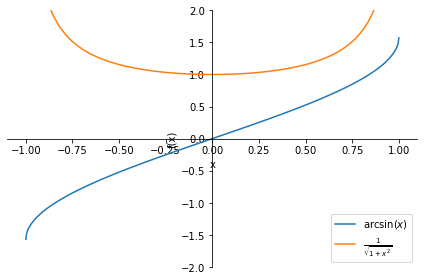

In [8]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define sine and cosine functions
f = sp.asin(x)
df = 1/sp.sqrt(1-x**2)

# Plot using SymPy's plot function
p = sp.plot(
    f, df,
    (x, -1, 1),
    legend=True,
    ylim=(-2, 2),
    show=False,  # To customize further
)
p[0].label = r"$\arcsin(x)$"
p[1].label = r"$\frac{1}{\sqrt{1+x^2}}$"
p.show()



### arccosine

The *arccosine* ($\cos^{-1}$ or $\arccos$) is the inverse of the *cosine* function in the interval $(0,\pi)$. It has $(-1,1)$ as its domain and $(0, \pi)$ as range.

$$
\arccos x = y \text{ if and only if } 0 < y < \pi\text{ and } \cos y = x
$$

Note that in the interval $(0, \pi)$, it holds that

$$
\sin x = \sqrt{1-\cos^2x}
$$

#### Derivative of arccosine

$$
\begin{align}
\frac{d\arccos x}{dx} &= -\frac{1}{\sin(\arccos x)}\\
&=-\frac{1}{\sqrt{1-\cos^2\arccos x}}\\
&= -\frac{1}{\sqrt{1-x^2}}
\end{align}
$$


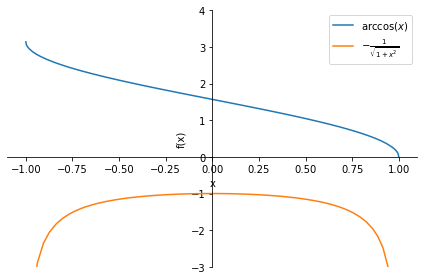

In [9]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define sine and cosine functions
f = sp.acos(x)
df = -1/sp.sqrt(1-x**2)

# Plot using SymPy's plot function
p = sp.plot(
    f, df,
    (x, -1, 1),
    legend=True,
    ylim=(-3, 4),
    show=False,  # To customize further
)
p[0].label = r"$\arccos(x)$"
p[1].label = r"$-\frac{1}{\sqrt{1+x^2}}$"
p.show()



### arctangent

The *arctangent* ($\tan^{-1}$ or $\arctan$) is the inverse of the *tangent* function in the interval $(-\frac{\pi}{2},\frac{\pi}{2})$. It has the real numbers as its domain and $(-\frac{\pi}{2}, \frac{\pi}{2})$ as its range.

$$
\arctan x = y \text{ if and only if } -\frac{\pi}{2} < y < \frac{\pi}{2}\text{ and } \tan y = x
$$

According to Pythagoras' Theorem:
$$
\begin{align}
\sin^2 x + \cos^2 x &= 1\\
\frac{\sin^2 x}{\cos^2 x} + \frac{\cos^2 x}{\cos^2 x} &= \frac{1}{\cos^2 x}\\
\tan^2 x + 1 &= \frac{1}{\cos^2 x}
\end{align}
$$


#### Derivative of arctangent

$$
\begin{align}
\frac{d\arctan x}{dx} &= \frac{1}{\frac{1}{\cos^2(\arctan x)}}\\
&=\frac{1}{(\tan(\arctan x))^2 + 1}\\
&= \frac{1}{1+x^2} 
\end{align}
$$


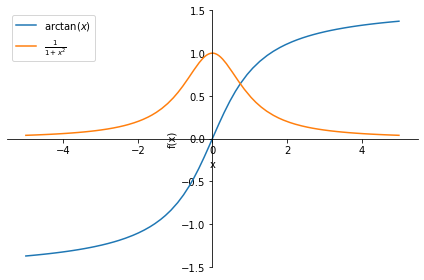

In [10]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define sine and cosine functions
f = sp.atan(x)
df = 1/(1+x**2)

# Plot using SymPy's plot function
p = sp.plot(
    f, df,
    (x, -5, 5),
    legend=True,
    ylim=(-1.5, 1.5),
    show=False,  # To customize further
)
p[0].label = r"$\arctan(x)$"
p[1].label = r"$\frac{1}{1+x^2}$"
p.show()



### arccotangent

The *arccotangent* ($\operatorname{cot}^{-1}$ or $\operatorname{arccot}$) is the inverse of the *cotangent* function in the interval $(0,\pi)$. It has the real numbers as its domain and $(0, \pi)$ as its range.

$$
\operatorname{arccot} x = y \text{ if and only if } 0 < y < \pi\text{ and } \cot y = x
$$

According to Pythagoras' Theorem:
$$
\begin{align}
\sin^2 x + \cos^2 x &= 1\\
\frac{\sin^2 x}{\cos^2 x} + \frac{\cos^2 x}{\cos^2 x} &= \frac{1}{\sin^2 x}\\
1 + \cot^2 x  &= \frac{1}{\sin^2 x}
\end{align}
$$


#### Derivative of arccotangent

$$
\begin{align}
\frac{d\operatorname{arccot} x}{dx} &= -\frac{1}{\frac{1}{\sin^2(\operatorname{arccot} x)}}\\
&=-\frac{1}{(\cot(\operatorname{arccot} x))^2 + 1}\\
&= -\frac{1}{1+x^2} 
\end{align}
$$


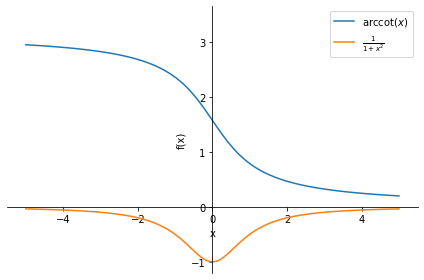

In [29]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define the adjusted arccotangent function
# Use a piecewise function to handle the negative and positive halves
arccot_adjusted = sp.Piecewise(
    (sp.acot(x), x >= 0),
    (sp.pi + sp.acot(x), x < 0)
)

# Define the derivative of the adjusted arccotangent
d_arccot_adjusted = sp.Piecewise(
    (-1 / (1 + x**2), x != 0),  # Derivative of arccot for x != 0
    (0, x == 0)                 # Define derivative as 0 at x = 0 for continuity
)

# Plot using SymPy's plot function
p = sp.plot(
    arccot_adjusted, d_arccot_adjusted,
    (x, -5, 5),
    legend=True,
    ylim=(-1.2, sp.pi + 0.5),  # Adjust ylim for the new range
    show=False  # To customize further
)

# Customize labels
p[0].label = r"$\operatorname{arccot}(x)$"
p[1].label = r"$\frac{1}{1+x^2}$"
p.show()


## Examples

$$
f(x) = \sin^2 x
$$

$$
\begin{align}
g(x) &= x^2\\
h(x) &= \sin x\\
f(x) &= g(h(x))\\
f'(x) &= h'(x) g'(h(x))\\
&= \cos x \times 2\sin x\\
&= 2\sin x \cos x
\end{align}
$$

$$
y = \sin\theta (1-\cos \theta)
$$

$$
\begin{align}
\frac{dy}{d\theta} &= \frac{d\sin\theta}{d\theta}(1-\cos\theta) + \sin\theta \frac{d(1-\cos\theta)}{d\theta}\\
&= \cos\theta(1-\cos\theta) + \sin\theta \sin\theta\\
&=\sin^2\theta +\cos\theta - \cos^2\theta
\end{align}
$$

$$s = \tan^2 t$$

$$
\begin{align}
\frac{ds}{dt} &= \frac{d\tan t}{dt} \left.\begin{aligned}\frac{dy^2}{dy}\end{aligned}\right|_{y=\tan t}\\
&=\frac{1}{\cos^2t} \times 2\tan t\\
&=2\frac{\tan t}{\cos^2 t}
\end{align}
$$

$$
y = \arcsin\cos x, 0\leq x\leq \pi
$$

$$
    \begin{align}
    \frac{dy}{dx} &= \frac{d\cos x}{dx} \left.\frac{d\arcsin z}{dz}\right|_{z=\cos x}\\
    &= -\sin x \frac{1}{\sqrt{1-\cos^2 x}}\\
    &= -\frac{\sin x}{\sin x} \\
    &= -1
    \end{align}
    $$